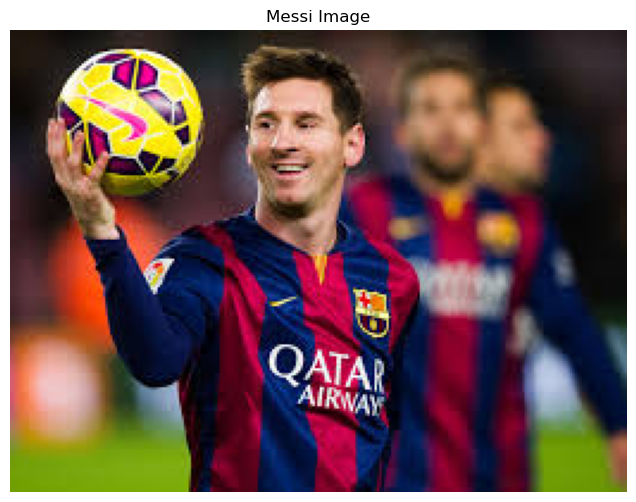

In [8]:
import cv2 
import numpy as np
import matplotlib.pyplot as plt

# Read an image and display it using matplotlib
img = cv2.imread(r'D:\FPT_Material\Sem 4\CPV301\Source for PE\Image\messi.jpg')
rgb_img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

# Show the image
plt.figure(figsize=(8, 6))  # Set figure size
plt.imshow(rgb_img)
plt.title('Messi Image')  # Set title
plt.axis('off')  # Hide axes
plt.show()

# Translation

Moves the image in space without rotating or resizing it.

📌 Transformation matrix:

$$
M = \begin{bmatrix}
1 & 0 & t_x \\
0 & 1 & t_y
\end{bmatrix}
$$


Translation Matrix:
 [[  1.   0. 100.]
 [  0.   1.  50.]]


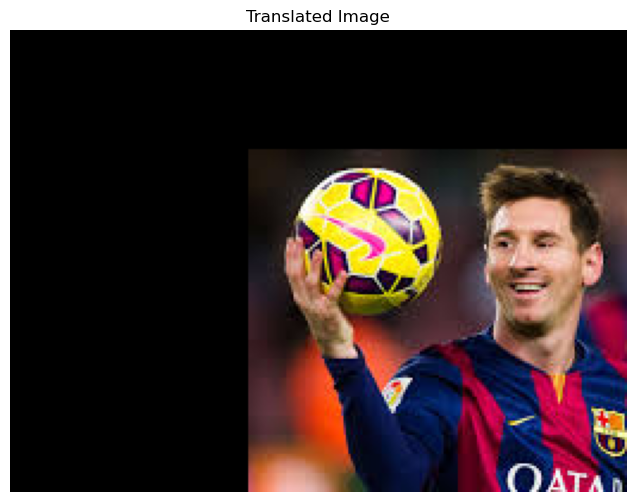

In [9]:
# Shift the image by 100 pixels in the x direction and 50 pixels in the y direction
tx, ty = 100, 50

# Create a translation matrix
translation_matrix = np.float32(
    [[1, 0, tx], 
    [0, 1, ty]]
)
print("Translation Matrix:\n", translation_matrix) 

# Apply the translation to the image
translated_img = cv2.warpAffine(img, translation_matrix, (img.shape[1], img.shape[0]))

# Show the translated image
plt.figure(figsize=(8, 6))  # Set figure size
plt.imshow(cv2.cvtColor(translated_img, cv2.COLOR_BGR2RGB))
plt.title('Translated Image')
plt.axis('off')  # Hide axes
plt.show()

# Euclidean (Rigid) Transformation

Combines rotation and translation. Preserves both angles and distances.

Rotation Matrix:
 [[  0.70710678   0.70710678 -30.80613255]
 [ -0.70710678   0.70710678 119.627417  ]]


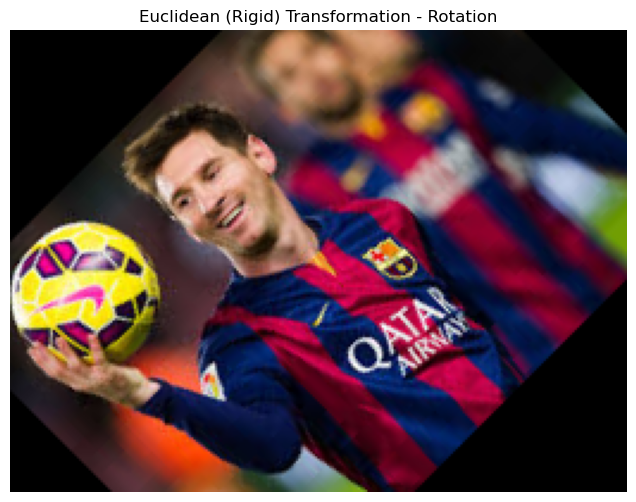

In [12]:
rows, cols, _ = img.shape

# Rotate the image by 45 degrees around its center
center = (cols // 2, rows // 2)
angle = 45  # Rotation angle in degrees
scale = 1.0 # No scaling for Euclidean transformation

# Create a rotation matrix
rotation_matrix = cv2.getRotationMatrix2D(center, angle, scale)
print("Rotation Matrix:\n", rotation_matrix)

# Apply the rotation to the image
euclidean_rotated_img = cv2.warpAffine(img, rotation_matrix, (cols, rows))

# Show the rotated image
plt.figure(figsize=(8, 6))  # Set figure size
plt.imshow(cv2.cvtColor(euclidean_rotated_img, cv2.COLOR_BGR2RGB))
plt.title('Euclidean (Rigid) Transformation - Rotation')
plt.axis('off')  # Hide axes
plt.show()

# Similarity Transformation

Combines scaling, rotation, and translation. Preserves shape (angles) but not necessarily size.

Similarity Transformation Matrix:
 [[ 0.64951905  0.375       8.83704218]
 [-0.375       0.64951905 82.37165187]]


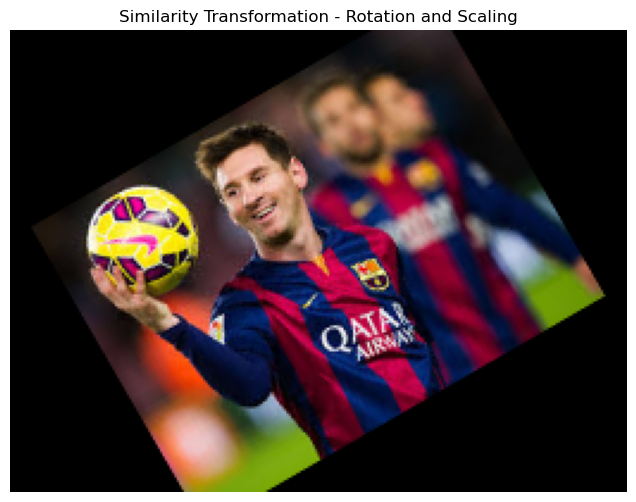

In [10]:
# Rotate by 30 degrees and scale by 0.75
angle_sim = 30
scale_sim = 0.75

# Create a similarity transformation matrix
similarity_matrix = cv2.getRotationMatrix2D(center, angle_sim, scale_sim)
print("Similarity Transformation Matrix:\n", similarity_matrix)

# Apply the similarity transformation to the image
similarity_transformed_img = cv2.warpAffine(img, similarity_matrix, (cols, rows))

# Show the similarity transformed image
plt.figure(figsize=(8, 6))  # Set figure size
plt.imshow(cv2.cvtColor(similarity_transformed_img, cv2.COLOR_BGR2RGB))
plt.title('Similarity Transformation - Rotation and Scaling')
plt.axis('off')  # Hide axes
plt.show()

# Affine Transformation

Preserves parallelism of lines but not angles or distances. Defined by mapping 3 points.

Affine Transformation Matrix:
 [[  1.26666667   0.6        -83.33333333]
 [ -0.33333333   1.          66.66666667]]


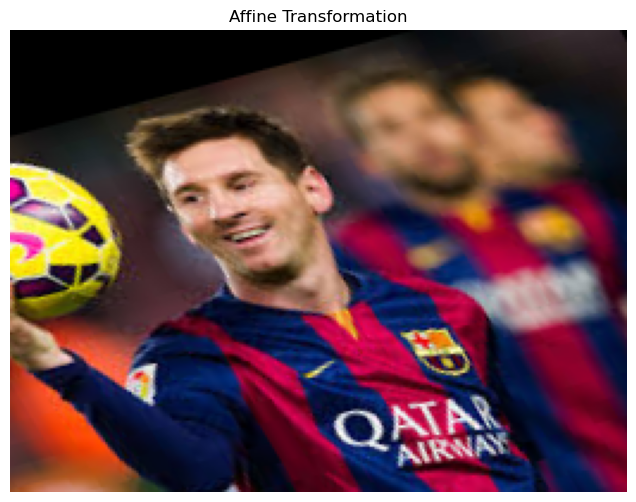

In [13]:
# Select 3 points in the original image
pts1_affine = np.float32([[50, 50], [200, 50], [50, 200]])

# Define new positions for these points in the transformed image
pts2_affine = np.float32([[10, 100], [200, 50], [100, 250]])

# Create an affine transformation matrix
affine_matrix = cv2.getAffineTransform(pts1_affine, pts2_affine)

# Print the affine transformation matrix
print("Affine Transformation Matrix:\n", affine_matrix)

# Apply the affine transformation to the image
affine_img = cv2.warpAffine(img, affine_matrix, (cols, rows))

# Show the affine transformed image
plt.figure(figsize=(8, 6))  # Set figure size
plt.imshow(cv2.cvtColor(affine_img, cv2.COLOR_BGR2RGB))
plt.title('Affine Transformation')
plt.axis('off')  # Hide axes
plt.show()

# Projective Transformation (Homography)

The most general transformation. Preserves straight lines only. Defined by mapping 4 points.

Projective Transformation Matrix:
 [[ 6.47191011e-01  8.56179775e-01 -6.47191011e+01]
 [-5.33707865e-01  2.19662921e+00  2.13483146e+01]
 [-3.70786517e-03  4.60674157e-03  1.00000000e+00]]


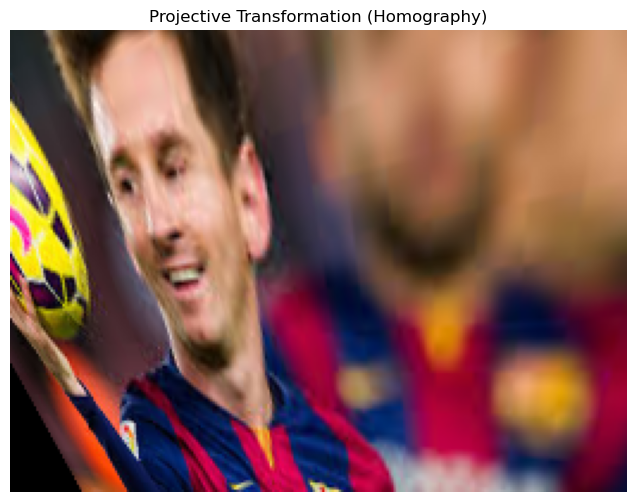

In [14]:
# Define 4 points in the original image
pts1_projective = np.float32([[50, 50], [200, 50], [50, 200], [200, 200]])

# Define new positions for these points in the transformed image
pts2_projective = np.float32([[10, 100], [220, 50], [80, 250], [200, 300]])

# Computer the perpective transformation matrix
projective_matrix = cv2.getPerspectiveTransform(pts1_projective, pts2_projective)

# Print the projective transformation matrix
print("Projective Transformation Matrix:\n", projective_matrix)

# Apply the projective transformation to the image
projective_img = cv2.warpPerspective(img, projective_matrix, (cols, rows))

# Show the projective transformed image
plt.figure(figsize=(8, 6))  # Set figure size
plt.imshow(cv2.cvtColor(projective_img, cv2.COLOR_BGR2RGB))
plt.title('Projective Transformation (Homography)')
plt.axis('off')  # Hide axes
plt.show()

# Show all in one


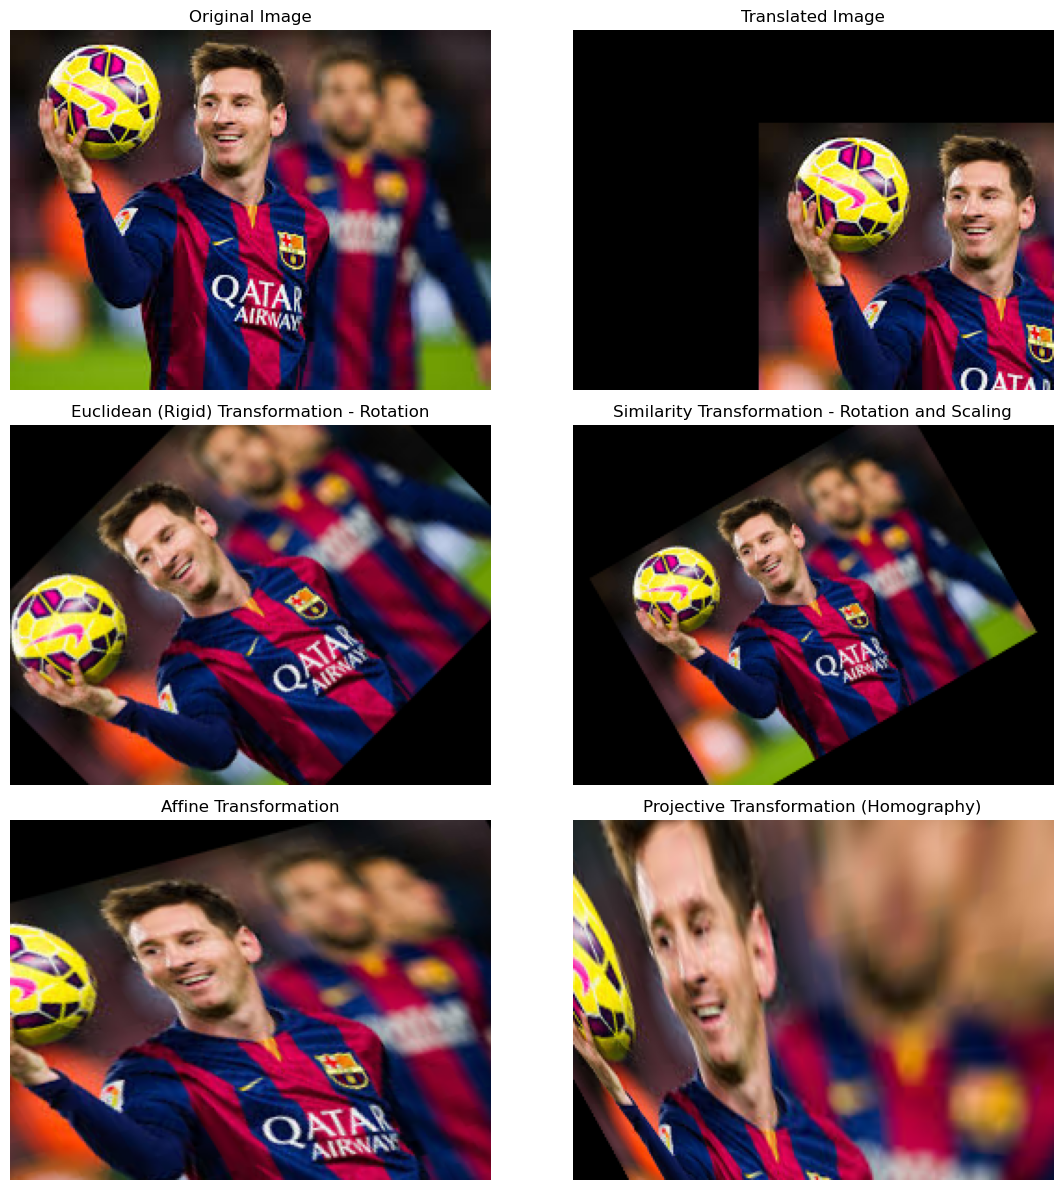

In [15]:
# Show all transformations in one figure
fig, axs = plt.subplots(3, 2, figsize=(12, 12))
# Display each image in a subplot

# Original image
axs[0, 0].imshow(rgb_img)
axs[0, 0].set_title('Original Image')
axs[0, 0].axis('off')

# Translated image
axs[0, 1].imshow(cv2.cvtColor(translated_img, cv2.COLOR_BGR2RGB))
axs[0, 1].set_title('Translated Image')
axs[0, 1].axis('off')

# Euclidean transformation (rotation)
axs[1, 0].imshow(cv2.cvtColor(euclidean_rotated_img, cv2.COLOR_BGR2RGB))
axs[1, 0].set_title('Euclidean (Rigid) Transformation - Rotation')
axs[1, 0].axis('off')

# Similarity transformation (rotation and scaling)
axs[1, 1].imshow(cv2.cvtColor(similarity_transformed_img, cv2.COLOR_BGR2RGB))
axs[1, 1].set_title('Similarity Transformation - Rotation and Scaling')
axs[1, 1].axis('off')

# Affine transformation
axs[2, 0].imshow(cv2.cvtColor(affine_img, cv2.COLOR_BGR2RGB))
axs[2, 0].set_title('Affine Transformation')
axs[2, 0].axis('off')

# Projective transformation (homography)
axs[2, 1].imshow(cv2.cvtColor(projective_img, cv2.COLOR_BGR2RGB))
axs[2, 1].set_title('Projective Transformation (Homography)')
axs[2, 1].axis('off')

plt.tight_layout()
plt.show()